In [1]:
import pandas as pd
import numpy as np

import itertools

# Обучене модели и подготовка данных
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale, label_binarize
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, classification_report
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


# визуализация
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12,8)})

import warnings
warnings.filterwarnings('ignore')


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def roc_curve(X, Y):
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(10, 8))
    fpr, tpr, thresholds = roc_curve(Y, lr.predict_proba(X)[:,1], pos_label=1)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')

In [2]:
best_col = ['TARGET', 'CREDIT', 'FACT_LIVING_TERM', 'FST_PAYMENT', 'AGE', 'PERSONAL_INCOME',
'WORK_TIME', 'LOAN_NUM_PAYM', 'TERM', 'EDUCATION', 'CHILD_TOTAL', 'DEPENDANTS',
'MARITAL_STATUS', 'FAMILY_INCOME', 'LOAN_NUM_CLOSED', 'FACT_PHONE_FL',
'LOAN_AVG_DLQ_AMT', 'GPF_DOCUMENT_FL', 'LOAN_MAX_DLQ_AMT', 'GENDER',
'FL_PRESENCE_FL', 'LOAN_NUM_TOTAL', 'HS_PRESENCE_FL', 'REG_FACT_POST_TP_FL',
'OWN_AUTO', 'REG_FACT_POST_FL', 'LOAN_DLQ_NUM', 'AUTO_RUS_FL', 'REG_POST_FL',
'REG_FACT_FL', 'PREVIOUS_CARD_NUM_UTILIZED', 'LAND_PRESENCE_FL',
'REG_PHONE_FL', 'FACT_POST_FL', 'SOCSTATUS_PENS_FL', 'LOAN_MAX_DLQ',
'ORG_TP_FCAPITAL', 'SOCSTATUS_WORK_FL', 'GAR_PRESENCE_FL', 'GEN_PHONE_FL',
'COT_PRESENCE_FL']

In [3]:
data = pd.read_csv('credit.clean', sep='\t', index_col=None)
data = data[best_col]
# CALC
X = data.loc[:, data.columns.difference(['TARGET'])].values
y = data['TARGET'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

     learning_rate  n_estimators  random_state  roc_auc_score       STD  \
0              0.1            85            30       0.668177  0.008017   
25             0.1            85            70       0.668685  0.025971   
15             0.1            85            54       0.669475  0.023298   
30             0.1            85            78       0.664118  0.006771   
35             0.1            85            86       0.670087  0.011173   
10             0.1            85            46       0.670152  0.009286   
20             0.1            85            62       0.668181  0.017181   
5              0.1            85            38       0.671568  0.026794   
235            0.1           125            86       0.667719  0.013422   
305            0.1           141            70       0.663791  0.024540   
210            0.1           125            46       0.666498  0.007032   
230            0.1           125            78       0.661710  0.007269   
220            0.1       

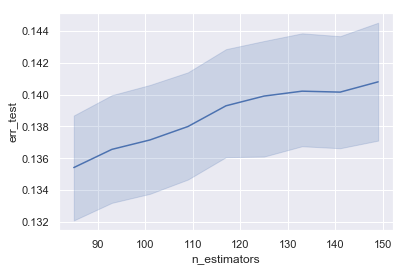

In [4]:
%%time
cv_scores_gbm = []

for k in range(85, 150, 8):
    for i in range(30, 90, 8):
        for l in np.arange(0.1, 2, 0.4):
            try:
                clf = GradientBoostingClassifier(learning_rate=l, n_estimators=k, random_state=i, verbose=0)
                kf = KFold(n_splits=5, random_state=i, shuffle=True)
                scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='roc_auc')
                clf.fit(X_train, y_train)
                err_train = np.mean(y_train != clf.predict(X_train))
                err_test  = np.mean(y_test  != clf.predict(X_test))
                cv_scores_gbm.append([l, k, i, scores.mean(), scores.std(), err_train, err_test])
            except:
                print (f'Error: {k}, {i}, {l}')

df_scores_gbm = pd.DataFrame(cv_scores_gbm, columns=['learning_rate', 'n_estimators', 'random_state', 'roc_auc_score', 'STD', 'err_train', 'err_test'])
print (df_scores_gbm.sort_values(by=['err_test'], ascending=True))
sns.lineplot(x="n_estimators", y="err_test", data=df_scores_gbm)

In [5]:
# 'learning_rate', 'n_estimators', 'random_state', 'roc_auc_score', 'STD', 'err_train', 'err_test'
print (df_scores_gbm.sort_values(by=['roc_auc_score', 'STD', 'err_train', 'err_test'],
                                 ascending=[False,True, True, True]).head())

     learning_rate  n_estimators  random_state  roc_auc_score       STD  \
5              0.1            85            38       0.671568  0.026794   
285            0.1           141            38       0.671388  0.024752   
45             0.1            93            38       0.671137  0.025739   
205            0.1           125            38       0.670953  0.025596   
325            0.1           149            38       0.670842  0.025402   

     err_train  err_test  
5     0.115600  0.121616  
285   0.113344  0.121815  
45    0.115502  0.122014  
205   0.114129  0.122014  
325   0.113050  0.122412  


[0.1, 42, 140, 0.675012327916844, 0.014187002921075494, 0.11697225218158643, 0.12161624203821655]
[0.1, 42, 42, 0.6720149887734348, 0.02025658553305292, 0.11697225218158643, 0.12161624203821655]
[0.1, 42, 56, 0.6648418931192339, 0.01459360074881247, 0.11697225218158643, 0.12161624203821655]
[0.1, 43, 140, 0.6753386317140802, 0.01435397764457164, 0.11697225218158643, 0.12161624203821655]
[0.1, 43, 42, 0.6720856532041485, 0.02034112362790108, 0.11697225218158643, 0.12161624203821655]
[0.1, 43, 56, 0.6654845192164085, 0.014630265351818555, 0.11697225218158643, 0.12161624203821655]
[0.1, 44, 140, 0.675490129588369, 0.013752938614101503, 0.11697225218158643, 0.12161624203821655]
[0.1, 44, 42, 0.6723568897892209, 0.02026921327227576, 0.11697225218158643, 0.12161624203821655]
[0.1, 44, 56, 0.666019933598914, 0.015083451988509206, 0.11697225218158643, 0.12161624203821655]
[0.1, 45, 140, 0.6754784275906056, 0.013297364245291907, 0.11707030100990293, 0.12161624203821655]
[0.1, 45, 42, 0.67236501

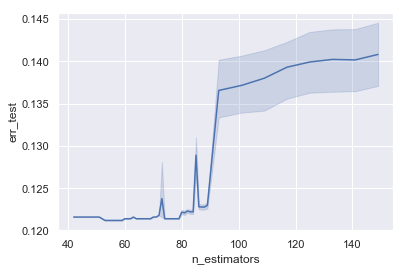

In [12]:
L = [.1]
K = range(42, 75, 1)
I = [140, 42, 56]
for k in K:
    for i in I:
        for l in L:
            clf = GradientBoostingClassifier(learning_rate=l, n_estimators=k, random_state=i, verbose=0)
            kf = KFold(n_splits=5, random_state=i, shuffle=True)
            scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='roc_auc')
            clf.fit(X_train, y_train)
            err_train = np.mean(y_train != clf.predict(X_train))
            err_test  = np.mean(y_test  != clf.predict(X_test))
            print ([l, k, i, scores.mean(), scores.std(), err_train, err_test])
            cv_scores_gbm.append([l, k, i, scores.mean(), scores.std(), err_train, err_test])
            
df_scores_gbm = pd.DataFrame(cv_scores_gbm, columns=['learning_rate', 'n_estimators', 'random_state', 'roc_auc_score', 'STD', 'err_train', 'err_test'])
print (df_scores_gbm.sort_values(by=['roc_auc_score', 'STD', 'err_train', 'err_test'],
                                 ascending=[False,True, True, True]).head())
sns.lineplot(x="n_estimators", y="err_test", data=df_scores_gbm)

In [14]:
%%time
gbm = GradientBoostingClassifier(learning_rate=.1, n_estimators=56, random_state=140, verbose=0)
kf = KFold(n_splits=5, random_state=56, shuffle=True)
parameters = {'n_estimators':range(50,301, 10),
              'learning_rate':[1, 0.5, 0.3, 0.2, 0.1], 
              'min_samples_split':[2,4,6],
              'min_samples_leaf':[2,4,6],
              'max_features':[4,5,6,7]}
clf = GridSearchCV(gbm, parameters, cv=kf, scoring='roc_auc')
clf.fit(X, y)

Wall time: 10h 21min 39s
